In [12]:
import pandas as pd
import numpy as np
import s3fs

In [2]:
file_name = 'D:/yeshiva/2 semester/info architecture/final/311_Service_Requests_from_2019_to_Present.csv'
data_sample =pd.read_csv(file_name) 

pd.set_option('display.max_columns', None)
data_sample.head(3)

D:\dev\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Latitude,Longitude,Location
0,1905940,41325694,2019-01-02 09:40:00,01/01/2019 12:55:00 AM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,NaN,NaN,NaN,NaN,INTERSECTION,NaN,Pending,NaN,Service Request status for this request is ava...,01/01/2019 12:55:00 AM,Unspecified BRONX,NaN,BRONX,NaN,NaN,UNKNOWN,Unspecified,BRONX,NaN,NaN,NaN
1,1906150,41326977,2019-01-02 10:51:00,01/01/2019 01:10:00 AM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,NaN,NaN,NaN,NaN,INTERSECTION,NaN,Pending,NaN,Service Request status for this request is ava...,01/01/2019 01:10:00 AM,Unspecified BRONX,NaN,BRONX,NaN,NaN,UNKNOWN,Unspecified,BRONX,NaN,NaN,NaN
2,1906354,41329612,2019-01-03 19:47:00,01/04/2019 08:47:00 AM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,NaN,NaN,NaN,NaN,INTERSECTION,NaN,Closed,NaN,Service Request status for this request is ava...,01/04/2019 08:47:00 AM,Unspecified BROOKLYN,NaN,BROOKLYN,NaN,NaN,UNKNOWN,Unspecified,BROOKLYN,NaN,NaN,NaN


In [3]:
data_sample.shape

(5270110, 31)

In [4]:
top_10_complaint_type = ['Noise - Residential', 'HEAT/HOT WATER', 'Illegal Parking',
       'Noise - Street/Sidewalk', 'Blocked Driveway', 'Street Condition',
       'Street Light Condition', 'Noise - Vehicle', 'UNSANITARY CONDITION',
       'Water System']

In [5]:
top_10_df = data_sample[data_sample['Complaint Type'].isin(top_10_complaint_type)]
top_10_df.head(2)

,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Latitude,Longitude,Location
0,1905940,41325694,2019-01-02 09:40:00,01/01/2019 12:55:00 AM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,NaN,NaN,NaN,NaN,INTERSECTION,NaN,Pending,NaN,Service Request status for this request is ava...,01/01/2019 12:55:00 AM,Unspecified BRONX,NaN,BRONX,NaN,NaN,UNKNOWN,Unspecified,BRONX,NaN,NaN,NaN
1,1906150,41326977,2019-01-02 10:51:00,01/01/2019 01:10:00 AM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,NaN,NaN,NaN,NaN,INTERSECTION,NaN,Pending,NaN,Service Request status for this request is ava...,01/01/2019 01:10:00 AM,Unspecified BRONX,NaN,BRONX,NaN,NaN,UNKNOWN,Unspecified,BRONX,NaN,NaN,NaN


In [6]:
top_10_df.shape

(2751380, 31)

In [7]:
df_bar = top_10_df.groupby(['Agency Name']).size()

#df_bar.sort_values(by='City', ascending=False).head(10).plot.bar()

In [8]:
df_bar.sort_values(ascending=False).head(10)

Agency Name
New York City Police Department                                1807484
Department of Housing Preservation and Development              550098
Department of Transportation                                    287956
Department of Environmental Protection                          105310
Traffic Management Center                                          529
Department of Information Technology and Telecommunications          3
dtype: int64

In [9]:
stats = [] #record holder
# loop through non numerical columns
for I in top_10_df.select_dtypes(exclude =['int64','float64']).columns:
    record = [] # initialize empty list
    record.append(I) #column name
    record.append(data_sample[I].isnull().sum()) # numer of isnull
    record.append(data_sample[I].nunique()) # numer of unique values
    record.append(data_sample[I].value_counts().index[0]) #modal value
    record.append(data_sample[I].value_counts()[0]) # count of modal value
    stats.append(record) #add record to larger array
    
#list to data frame
columns = ['Column Name','isnull count','number of unique values','most popululous column','count']    
 
stats_df = pd.DataFrame(data=stats,columns=columns)
stats_df

,Column Name,isnull count,number of unique values,most popululous column,count
0,Created Date,0,4303363,2021-01-13 12:00:00,178
1,Closed Date,206031,3082650,06/04/2019 12:00:00 AM,1705
2,Agency,0,28,NYPD,2214155
3,Agency Name,0,413,New York City Police Department,2213626
4,Complaint Type,0,375,Noise - Residential,677350
5,Descriptor,144743,1267,Loud Music/Party,799211
6,Location Type,1159331,164,Street/Sidewalk,1198417
7,Incident Zip,151999,1026,10466,109600
8,Incident Address,395004,781909,655 EAST 230 STREET,41788
9,Street Name,395269,17414,BROADWAY,58461


D:\dev\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\dev\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\dev\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\dev\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
<ipython-input-10-d27f4831b5d1>:10: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()
D:\dev\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=

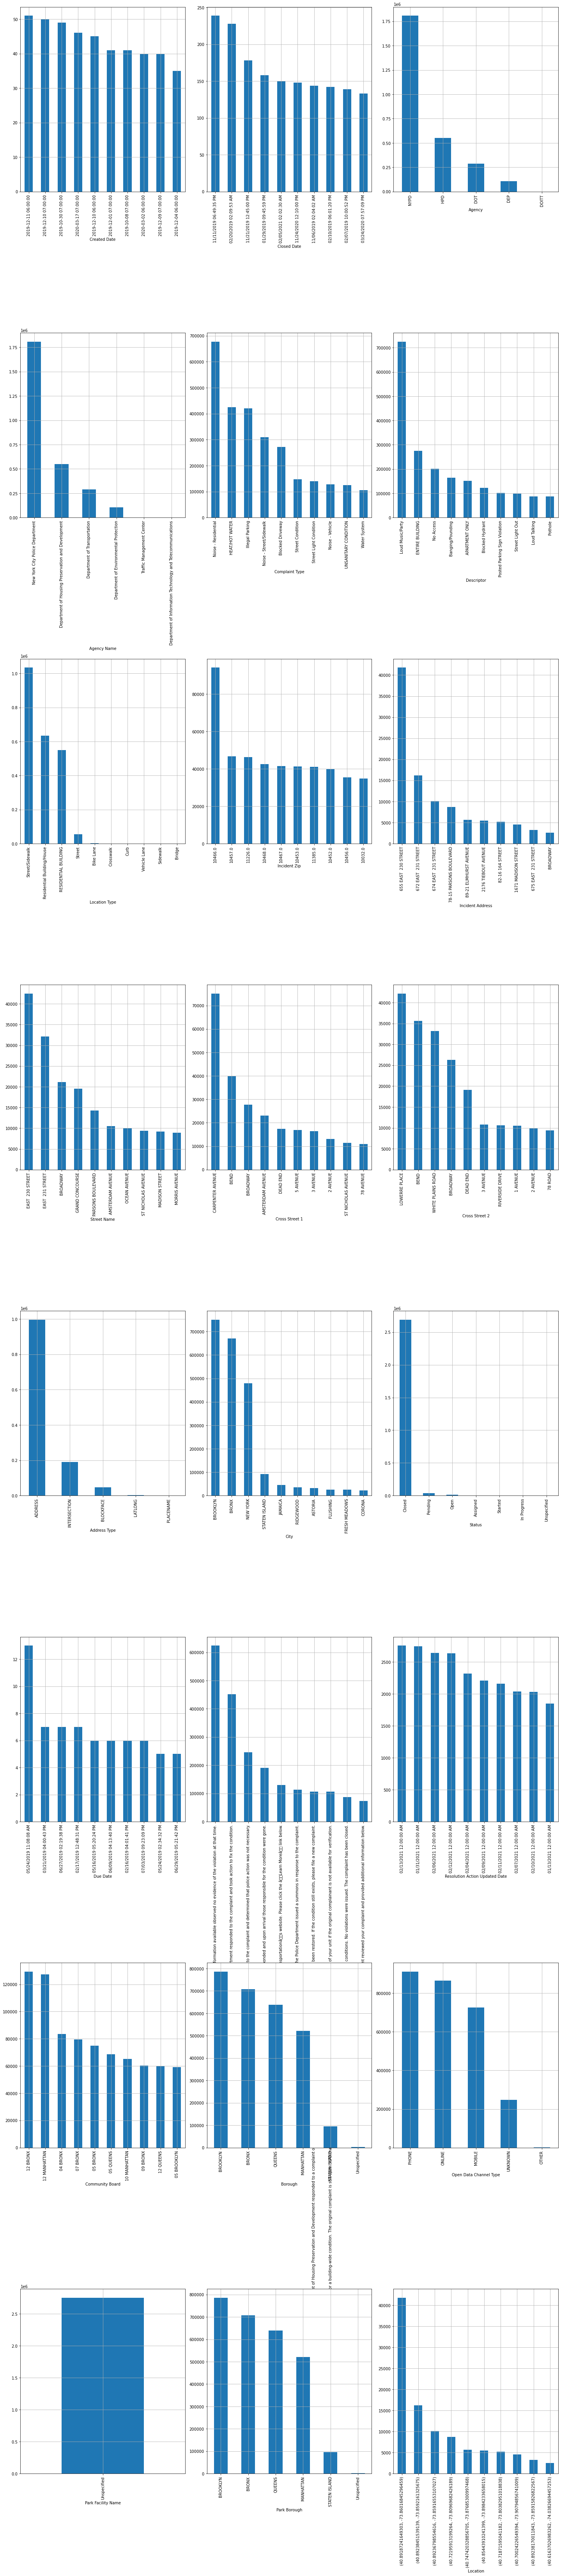

In [10]:
import matplotlib.pyplot as plt
#boxplot of all variables
plt.figure(figsize = (20, 100))
for i, col in enumerate(list(top_10_df.select_dtypes(exclude =['int64','float64']).columns.values)):
    plt.subplot(9, 3, i + 1)
    #top_10_df.bar(col)
    df_bar = top_10_df.groupby([col]).size()
    df_bar.sort_values(ascending=False).head(10).plot.bar()
    plt.grid()
    plt.tight_layout()
plt.show()

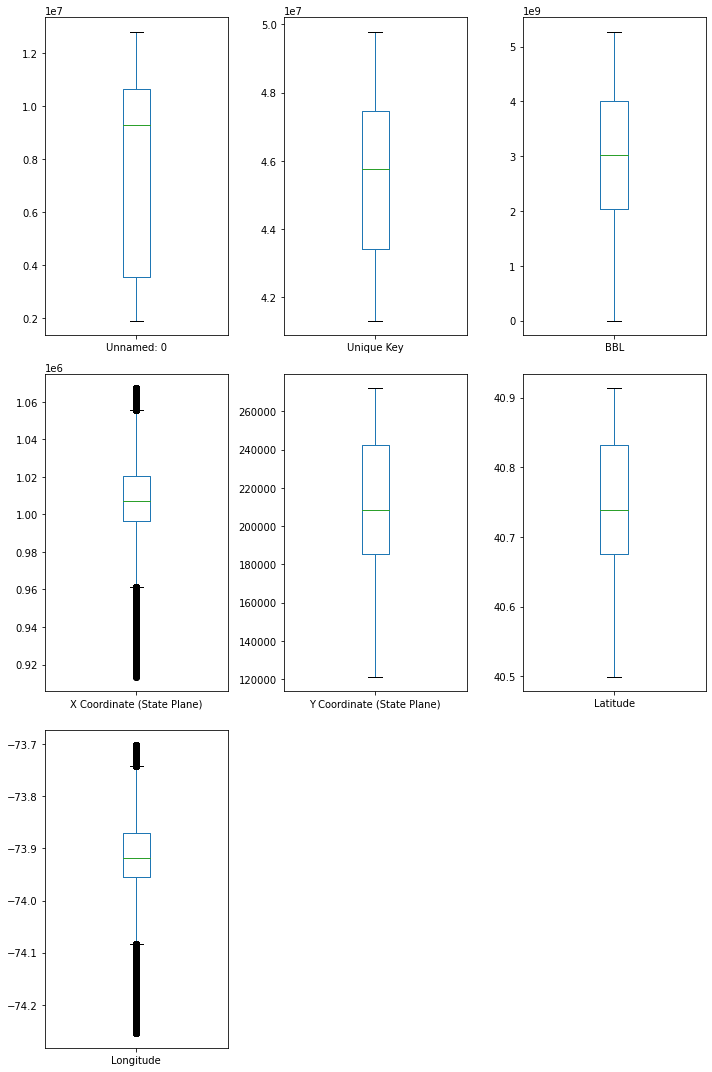

In [11]:
import matplotlib.pyplot as plt
#boxplot of all variables
plt.figure(figsize = (10, 15))
for i, col in enumerate(list(top_10_df.select_dtypes(include =['int64','float64']).columns.values)):
    plt.subplot(3, 3, i + 1)
    top_10_df.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [13]:
def save_to_s3(df):
    
    byte_encoded_csv = df.to_csv(None).encode() #encodes file as binary
    
    # s3://g2-final/readme.txt
    filename = 's3://information-arch-yuehao-wang-assignment-8a/' #specify location of s3:/{my-bucket}/
    groupname= '311_Service_Requests_from_2019_to_Present' #name of your group
    
    filenames3 = "%s%s.csv"%(filename, groupname) #name of the filepath and csv file
    print(filenames3)
    
    s3 = s3fs.S3FileSystem(anon=False)
    
    with s3.open(filenames3, 'wb') as file:
        file.write(byte_encoded_csv) #writes byte-encoded file to s3 location

    #print success message
    print("Successfull uploaded file to location:"+str(filenames3))


save_to_s3(top_10_df)

s3://information-arch-yuehao-wang-assignment-8a/311_Service_Requests_from_2019_to_Present.csv
Successfull uploaded file to location:s3://information-arch-yuehao-wang-assignment-8a/311_Service_Requests_from_2019_to_Present.csv


In [14]:
top_10_df.to_csv('D:/yeshiva/2 semester/info architecture/final/311_Service_Requests_from_2019_to_Present_10_complaint_type.csv', encoding='utf-8')